In [275]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16, 'figure.figsize':(12, 6)})

<Figure size 864x432 with 0 Axes>

In [276]:
import pandas as pd
import lmfit.models

In [277]:
import numpy as np

In [278]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [279]:
import sys

In [280]:
sys.path.append('../oct2022/uncertainty/nr_only/aug2023/redo/data_preparation/')

In [281]:
import nr_utils

In [282]:
!ls /Users/sebastian.khan/personal/data/SXS_BBH_*

/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res3.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res4.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res5.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res3.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res4.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res5.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res2.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res3.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res3.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res4.h5
/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res5.h5


In [283]:
nrfile = "/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5" #q=1
# nrfile = "/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res3.h5" #q=10
# nrfile = "/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5" #q=2

In [284]:
nrls={}
simname = nrfile.split('/')[-1].split('.h5')[0]
nrls[simname] = {}
for ell, mm in [(2,2), (3,2), (4,4), (5,4)]:
    nrls[simname][ell, mm] = nr_utils.NRLoader(handler='nr_hdf5', nr_hdf5_filename=nrfile, dt=0.1, safety_factor=0.5, ell=ell, mm=mm)

(-100.0, 100.0)

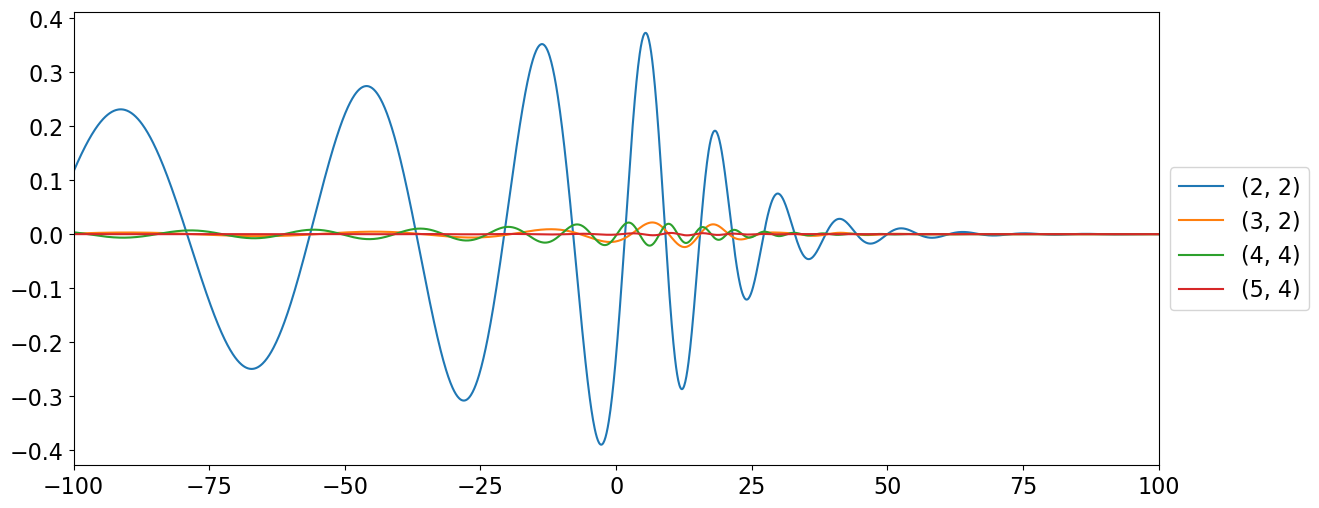

In [285]:
plt.figure(figsize=(14, 6), dpi=100)
for ell, mm in nrls[simname].keys():
    t = nrls[simname][ell,mm].times
    s = nrls[simname][ell,mm].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]
    # print(t_max)

    # plt.plot(t-t_max, s.real, label=k)
    # plt.plot(t-t_max, np.abs(s)/nrls[simname][ell,mm].eta, label=k)
    # plt.plot(t-t_max, np.abs(s), label=k)
    plt.plot(t, np.real(s), label=(ell,mm))
    # plt.plot(t, np.abs(s), label=(ell,mm))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-100, 100)
# plt.yscale('log')

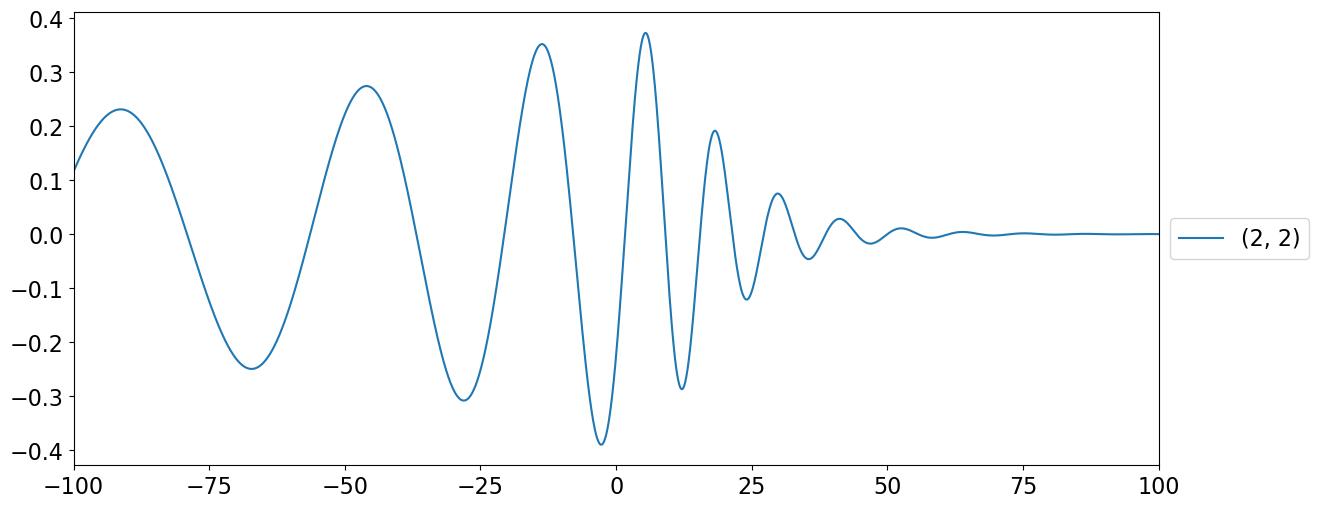

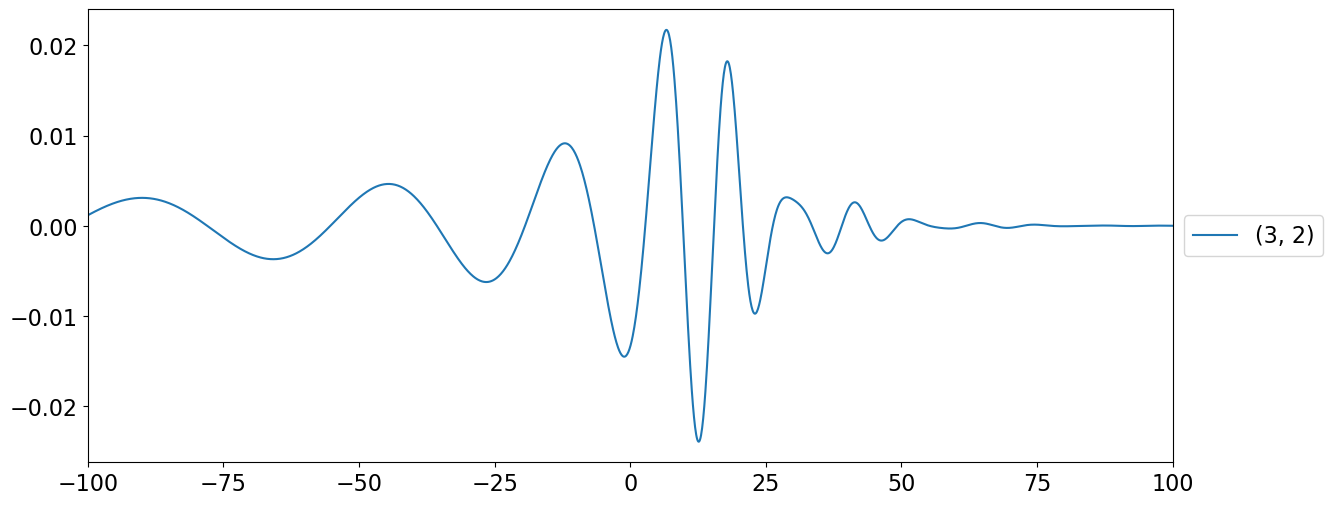

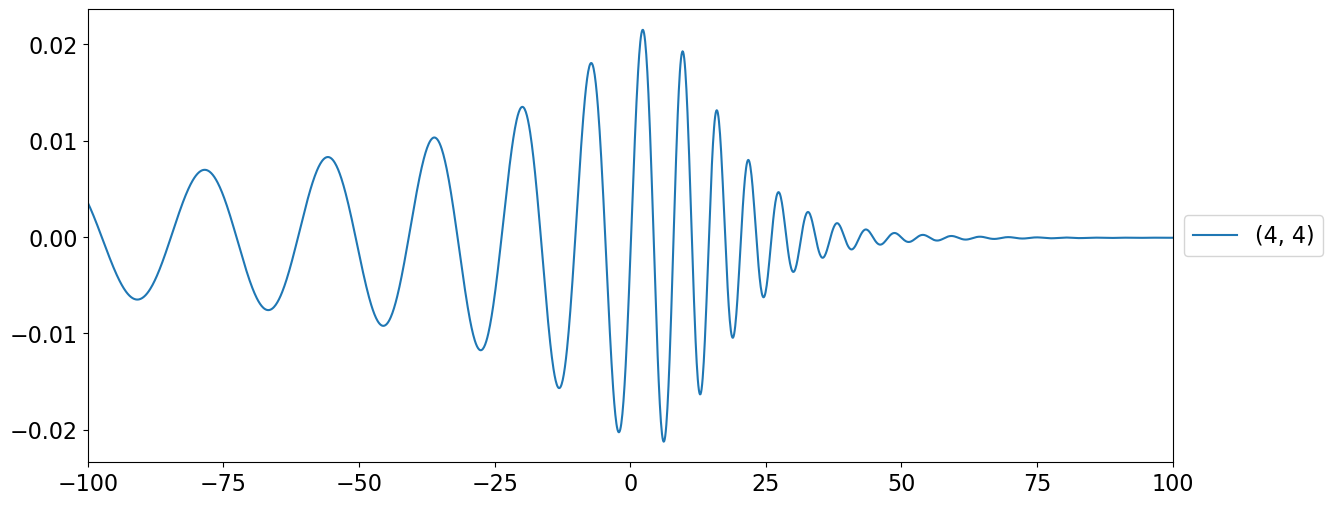

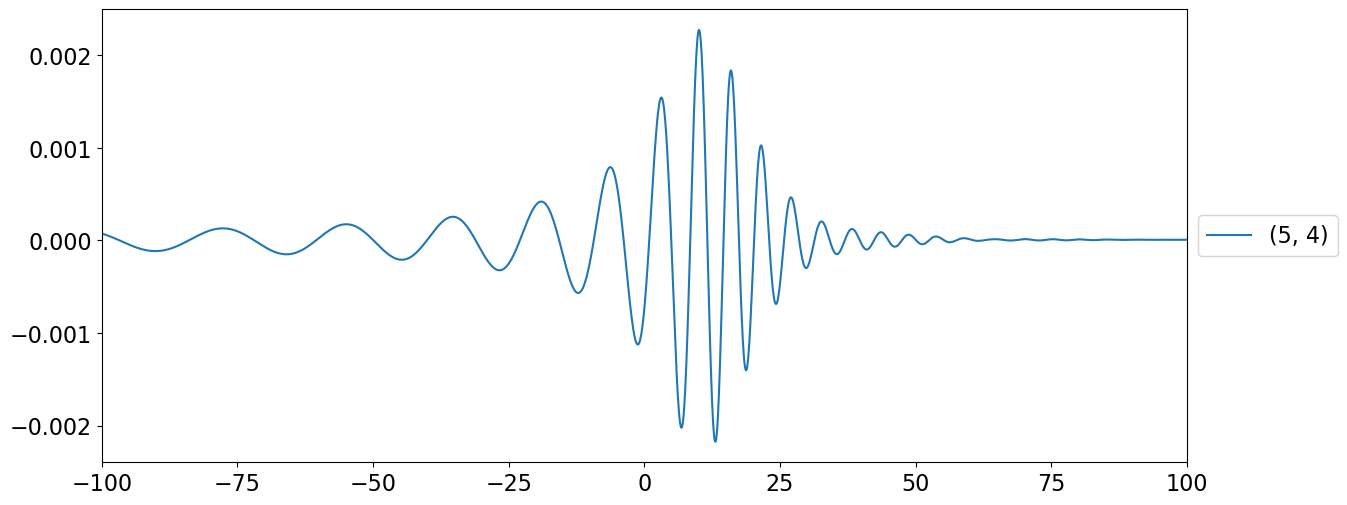

In [286]:

for ell, mm in nrls[simname].keys():
    plt.figure(figsize=(14, 6), dpi=100)
    t = nrls[simname][ell,mm].times
    s = nrls[simname][ell,mm].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]
    # print(t_max)

    # plt.plot(t-t_max, s.real, label=k)
    # plt.plot(t-t_max, np.abs(s)/nrls[simname][ell,mm].eta, label=k)
    # plt.plot(t-t_max, np.abs(s), label=k)
    plt.plot(t, np.real(s), label=(ell,mm))
    # plt.plot(t, np.abs(s), label=(ell,mm))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim(-100, 100)
    # plt.yscale('log')

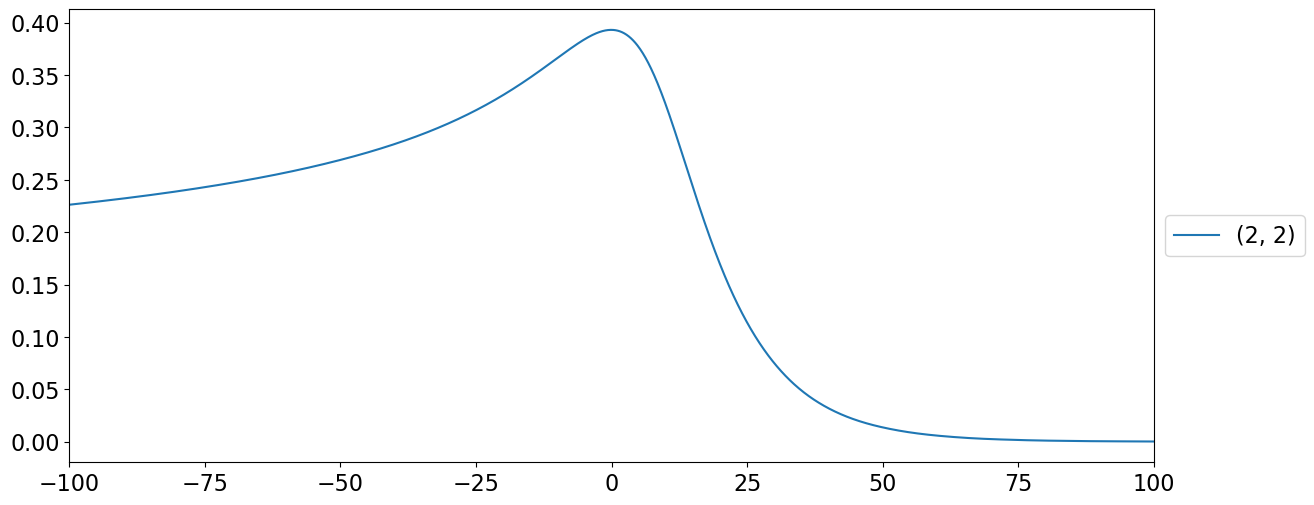

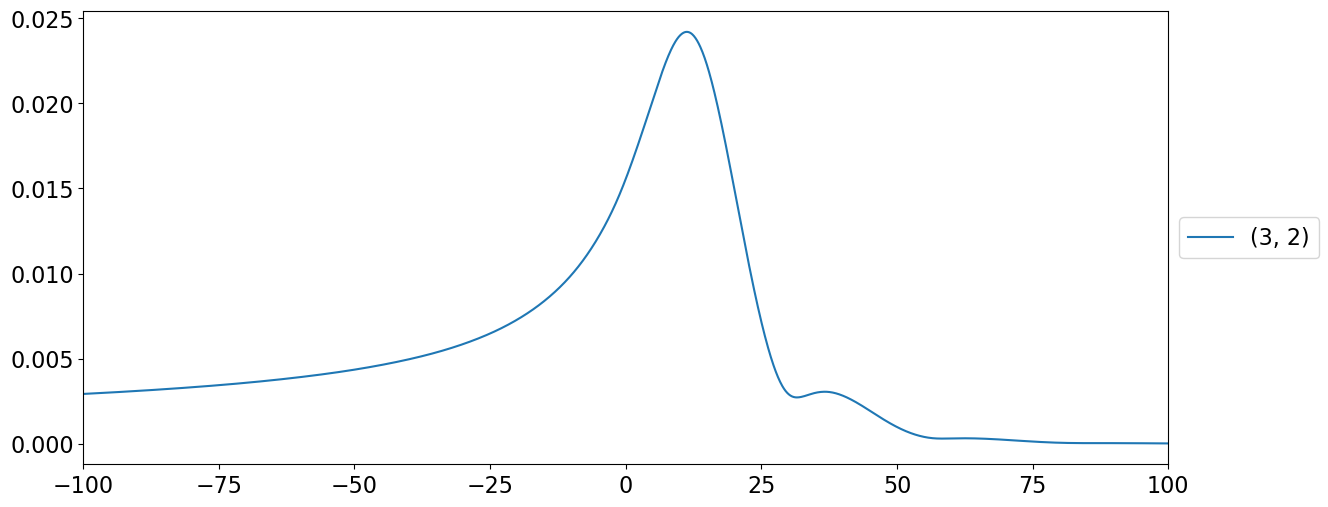

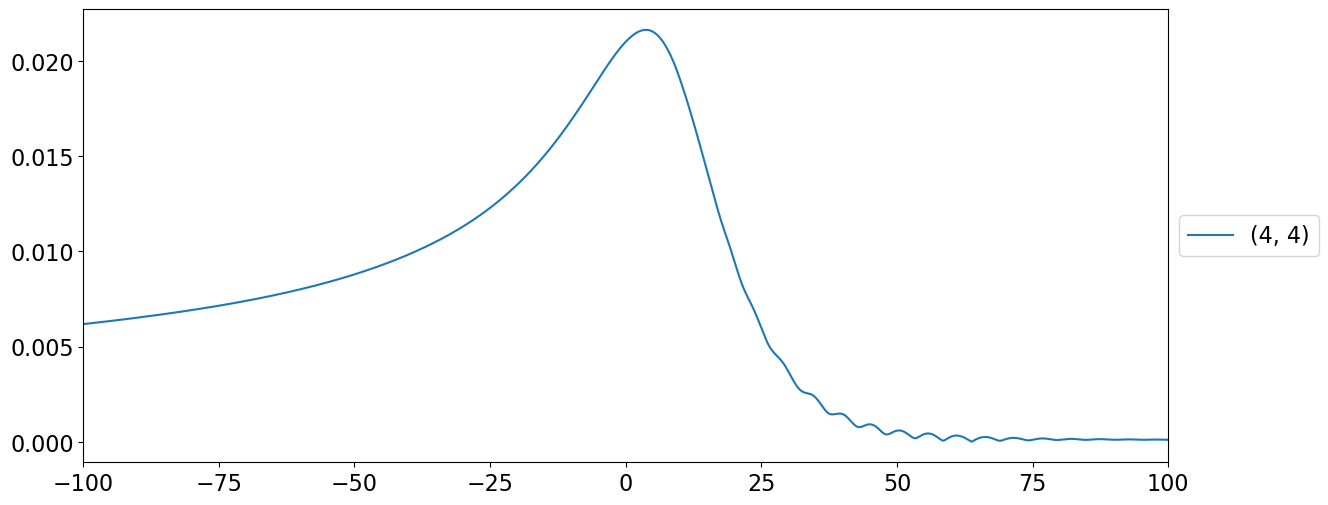

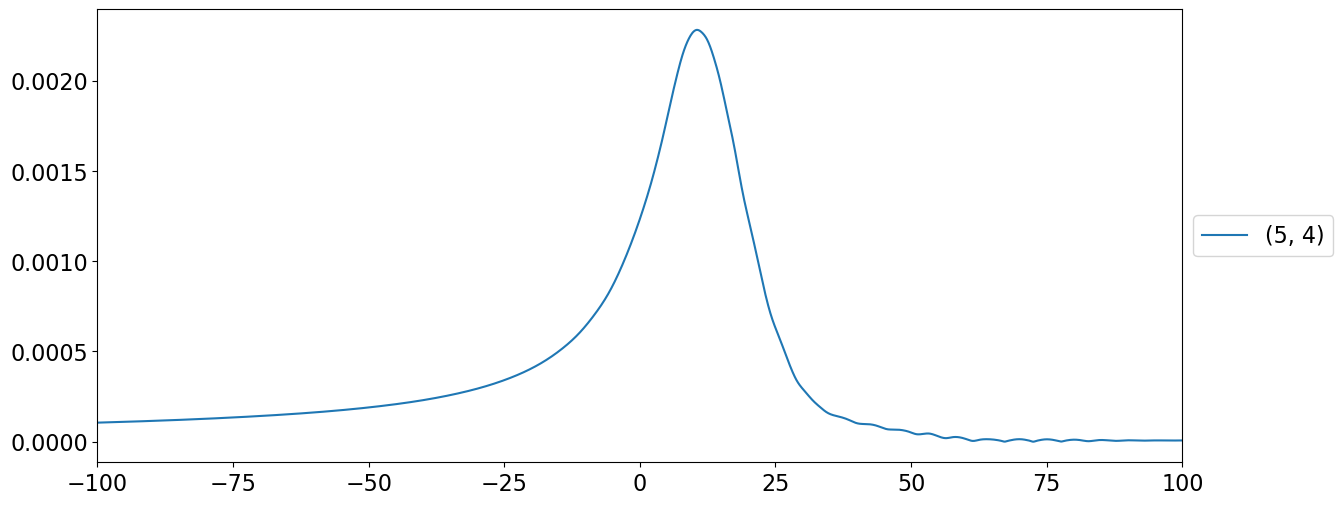

In [287]:

for ell, mm in nrls[simname].keys():
    plt.figure(figsize=(14, 6), dpi=100)
    t = nrls[simname][ell,mm].times
    s = nrls[simname][ell,mm].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]
    # print(t_max)

    # plt.plot(t-t_max, s.real, label=k)
    # plt.plot(t-t_max, np.abs(s)/nrls[simname][ell,mm].eta, label=k)
    # plt.plot(t-t_max, np.abs(s), label=k)
    # plt.plot(t, np.real(s), label=(ell,mm))
    plt.plot(t, np.abs(s), label=(ell,mm))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim(-100, 100)
    # plt.yscale('log')

# 3,2 mode

In [288]:
nrls[simname][2,2].eta

0.25

In [289]:
nrls[simname][2,2].q

1.000000000542

In [290]:
eta = nrls[simname][2,2].eta

In [291]:
ell, mm = 2, 2
t_22 = nrls[simname][ell,mm].times
s_22 = nrls[simname][ell,mm].strain/eta

In [292]:
ell, mm = 3, 2
t_32 = nrls[simname][ell,mm].times
s_32 = nrls[simname][ell,mm].strain/eta

In [293]:
np.testing.assert_array_equal(t_22, t_32)

In [294]:
t = t_22.copy()

(-100.0, 100.0)

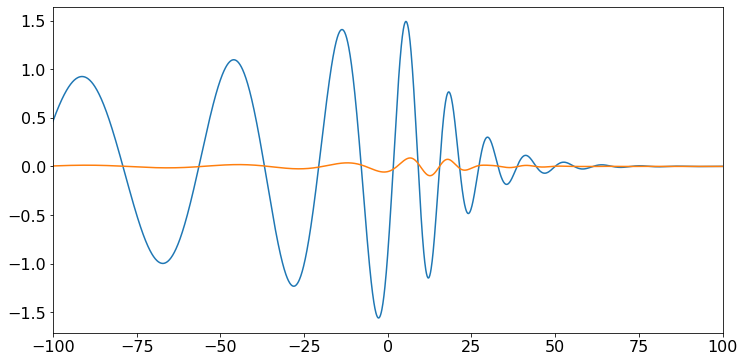

In [295]:
plt.figure(figsize=(12, 6))
plt.plot(t, s_22.real)
plt.plot(t, s_32.real)
plt.xlim(-100, 100)

## fitting

In [296]:
mask_fit = (t >= 30) & (t <= 200)
x = t[mask_fit]
# y_strain = s_22[mask_fit]
y_strain = s_32[mask_fit]
y = y_strain.real

In [297]:
# f_ring = metadata.loc[idx]['fring']
# f_damp = metadata.loc[idx]['fdamp']

# q=1 numbers
f_ring = 0.088087
f_damp = 0.013596

In [298]:
f_ring_angular = f_ring*2*np.pi
f_damp_angular = f_damp*2*np.pi

print(f_ring_angular)
print(f_damp_angular)

print(1/f_damp_angular)

0.5534669441535282
0.08542618743641366
11.706012289783418


In [299]:
def resid(params, x, ydata=None, use_sin=False):
    decay = params['decay'].value
    phi0 = params['phi0'].value
    t0 = params['t0'].value
    omega = params['omega'].value
    amp = params['amp'].value

    if use_sin:
        y_model = amp * np.exp(-(x-t0)/decay) * np.sin(x*omega + phi0)
    else:
        y_model = amp * np.exp(-(x-t0)/decay) * np.cos(x*omega + phi0)
    if type(ydata) == np.ndarray:
        return y_model - ydata
    else:
        return y_model

In [300]:
phi0_init = 1.0
t0_init = 1.0
amp_init = 0.5
# omega_init = 0.5
omega_init = f_ring_angular
# decay_init = 17
decay_init = 1/f_damp_angular






np.random.seed(2)
# x = np.linspace(0, 10, 101)
# y = offset + amp*np.sin(omega*x) * np.exp(-x/decay)
# yn = y + np.random.normal(size=y.size, scale=0.450)

params = lmfit.Parameters()
params.add('phi0', phi0_init, min=-100, max=100.0)
params.add('t0', t0_init, min=-100, max=100.0)
params.add('omega', omega_init, min=0, max=100.0, vary=True)
params.add('amp', amp_init, min=0, max=100.0)
params.add('decay', decay_init, min=0, max=100.0, vary=True)
# params.add('decay', 11, min=0, max=100.0, vary=False)
o1 = lmfit.minimize(resid, params, args=(x, y), method='leastsq')
print("# Fit using leastsq:")
lmfit.report_fit(o1)

# Fit using leastsq:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 113
    # data points      = 1700
    # variables        = 5
    chi-square         = 9.5215e-04
    reduced chi-square = 5.6174e-07
    Akaike info crit   = -24461.7994
    Bayesian info crit = -24434.6075
##  Warning: uncertainties could not be estimated:
[[Variables]]
    phi0:   1.26076588 +/- 0.04050010 (3.21%) (init = 1)
    t0:    -99.9950789 +/-        nan (nan%) (init = 1)
    omega:  0.57421353 +/- 0.00101099 (0.18%) (init = 0.5534669)
    amp:    33.8511575 +/-        nan (nan%) (init = 0.5)
    decay:  16.7510621 +/- 0.25954845 (1.55%) (init = 11.70601)
[[Correlations]] (unreported correlations are < 0.100)
    C(phi0, omega) = -0.978


In [301]:
o1.params

Parameters([('phi0', <Parameter 'phi0', value=1.2607658786217115 +/- 0.0405, bounds=[-100:100.0]>), ('t0', <Parameter 't0', value=-99.99507893489248 +/- nan, bounds=[-100:100.0]>), ('omega', <Parameter 'omega', value=0.5742135300002782 +/- 0.00101, bounds=[0:100.0]>), ('amp', <Parameter 'amp', value=33.85115747783304 +/- nan, bounds=[0:100.0]>), ('decay', <Parameter 'decay', value=16.75106210718047 +/- 0.26, bounds=[0:100.0]>)])

In [302]:
yhat = resid(o1.params, x)

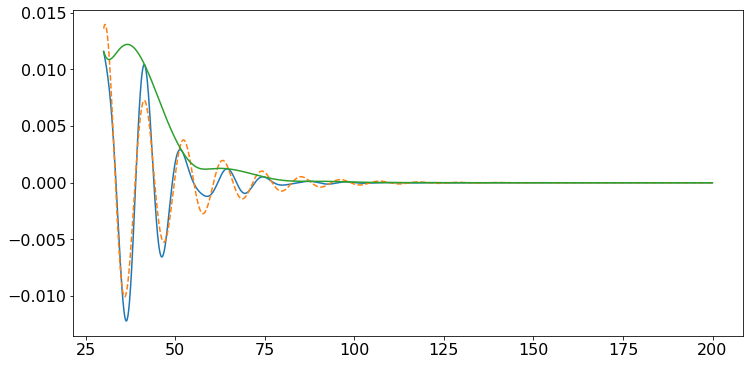

In [303]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.plot(x, yhat, ls='--')
plt.plot(x, np.abs(y_strain))
# plt.yscale('log')

## two mode model

In [304]:
mask_fit = (t >= 30) & (t <= 200)
x = t[mask_fit]
# y_strain = s_22[mask_fit]
y_strain = s_32[mask_fit]
y = y_strain.real

In [305]:
# f_ring = metadata.loc[idx]['fring']
# f_damp = metadata.loc[idx]['fdamp']

# q=1 numbers
f_ring = 0.088087
f_damp = 0.013596

In [306]:
f_ring_angular = f_ring*2*np.pi
f_damp_angular = f_damp*2*np.pi

print(f_ring_angular)
print(f_damp_angular)

print(1/f_damp_angular)

0.5534669441535282
0.08542618743641366
11.706012289783418


In [307]:
def resid(params, x, ydata=None, use_sin=False):
    decay_22 = params['decay_22'].value
    phi0_22 = params['phi0_22'].value
    t0_22 = params['t0_22'].value
    omega_22 = params['omega_22'].value
    amp_22 = params['amp_22'].value
    
    decay_32 = params['decay_32'].value
    phi0_32 = params['phi0_32'].value
    t0_32 = params['t0_32'].value
    omega_32 = params['omega_32'].value
    amp_32 = params['amp_32'].value

    if use_sin:
        term_22 = amp_22 * np.exp(-(x-t0_22)/decay_22) * np.sin(x*omega_22 + phi0_22)
        term_32 = amp_32 * np.exp(-(x-t0_32)/decay_32) * np.sin(x*omega_32 + phi0_32)
        y_model = term_22 + term_32
    else:
        term_22 = amp_22 * np.exp(-(x-t0_22)/decay_22) * np.cos(x*omega_22 + phi0_22)
        term_32 = amp_32 * np.exp(-(x-t0_32)/decay_32) * np.cos(x*omega_32 + phi0_32)
        y_model = term_22 + term_32
    if type(ydata) == np.ndarray:
        return y_model - ydata
    else:
        return y_model

In [308]:
phi0_init = 1.0
t0_init = 1.0
amp_init = 0.5
# omega_init = 0.5
omega_22_init = f_ring_angular
# decay_init = 17
decay_22_init = 1/f_damp_angular

omega_32_init = omega_22_init
decay_32_init = decay_22_init






np.random.seed(2)
# x = np.linspace(0, 10, 101)
# y = offset + amp*np.sin(omega*x) * np.exp(-x/decay)
# yn = y + np.random.normal(size=y.size, scale=0.450)

params = lmfit.Parameters()
params.add('phi0_22', phi0_init, min=-100, max=100.0)
params.add('t0_22', t0_init, min=-100, max=100.0)
params.add('omega_22', omega_22_init, min=0, max=100.0, vary=True)
params.add('amp_22', amp_init, min=0, max=100.0)
params.add('decay_22', decay_22_init, min=0, max=100.0, vary=True)

params.add('phi0_32', phi0_init, min=-100, max=100.0)
params.add('t0_32', t0_init, min=-100, max=100.0)
params.add('omega_32', omega_32_init, min=0, max=100.0, vary=True)
params.add('amp_32', amp_init, min=0, max=100.0)
params.add('decay_32', decay_32_init, min=0, max=100.0, vary=True)


# params.add('decay', 11, min=0, max=100.0, vary=False)
o1 = lmfit.minimize(resid, params, args=(x, y), method='leastsq')
print("# Fit using leastsq:")
lmfit.report_fit(o1)

# Fit using leastsq:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 325
    # data points      = 1700
    # variables        = 10
    chi-square         = 2.4086e-08
    reduced chi-square = 1.4252e-11
    Akaike info crit   = -42446.0642
    Bayesian info crit = -42391.6803
[[Variables]]
    phi0_22:   2.29331254 +/- 3.4873e-04 (0.02%) (init = 1)
    t0_22:    -22.5506876 +/- 48840.8128 (216582.37%) (init = 1)
    omega_22:  0.55282096 +/- 8.7223e-06 (0.00%) (init = 0.5534669)
    amp_22:    1.81822523 +/- 7597.34874 (417844.20%) (init = 0.5)
    decay_22:  11.6874497 +/- 0.00138883 (0.01%) (init = 11.70601)
    phi0_32:  -8.06539458 +/- 9.5378e-04 (0.01%) (init = 1)
    t0_32:    -29.8379332 +/- 51089.7255 (171224.08%) (init = 1)
    omega_32:  0.79133068 +/- 2.3506e-05 (0.00%) (init = 0.5534669)
    amp_32:    1.87031809 +/- 8594.37062 (459513.85%) (init = 0.5)
    decay_32:  11.1183224 +/- 0.00298288 (0.03%) (init = 11.70601)
[[Correlations]] (unreport

In [309]:
o1.params

Parameters([('phi0_22', <Parameter 'phi0_22', value=2.293312540166397 +/- 0.000349, bounds=[-100:100.0]>), ('t0_22', <Parameter 't0_22', value=-22.550687615809252 +/- 4.88e+04, bounds=[-100:100.0]>), ('omega_22', <Parameter 'omega_22', value=0.5528209567522258 +/- 8.72e-06, bounds=[0:100.0]>), ('amp_22', <Parameter 'amp_22', value=1.8182252265874221 +/- 7.6e+03, bounds=[0:100.0]>), ('decay_22', <Parameter 'decay_22', value=11.6874497311777 +/- 0.00139, bounds=[0:100.0]>), ('phi0_32', <Parameter 'phi0_32', value=-8.065394579547672 +/- 0.000954, bounds=[-100:100.0]>), ('t0_32', <Parameter 't0_32', value=-29.83793319891393 +/- 5.11e+04, bounds=[-100:100.0]>), ('omega_32', <Parameter 'omega_32', value=0.7913306811429988 +/- 2.35e-05, bounds=[0:100.0]>), ('amp_32', <Parameter 'amp_32', value=1.870318090973283 +/- 8.59e+03, bounds=[0:100.0]>), ('decay_32', <Parameter 'decay_32', value=11.118322439064066 +/- 0.00298, bounds=[0:100.0]>)])

In [310]:
yhat = resid(o1.params, x)

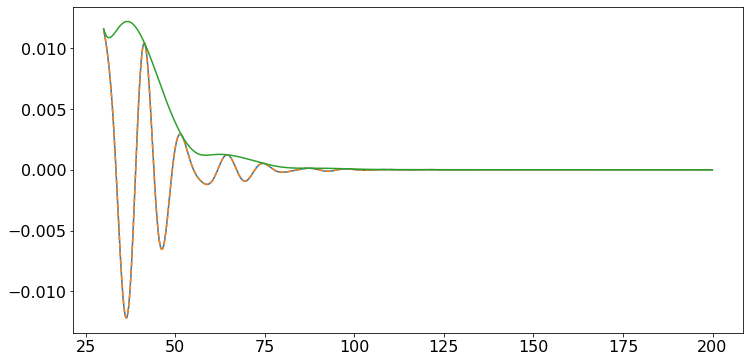

In [311]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.plot(x, yhat, ls='--')
plt.plot(x, np.abs(y_strain))
# plt.yscale('log')

In [329]:
# mask = (t >= -1000) & (t <= 200)
# mask = (t >= -100) & (t <= 200)
# mask = (t >= -100) & (t <= 120)
# mask = (t >= 0) & (t <= 150)
# mask = (t >= 0) & (t <= 120)
mask = (t >= -20) & (t <= 120)
x = t[mask]
y = s_32[mask]

In [330]:
yhat_real = resid(o1.params, x)

In [331]:
yhat_imag = resid(o1.params, x, use_sin=True)

In [332]:
yhat = yhat_real + 1.j*yhat_imag

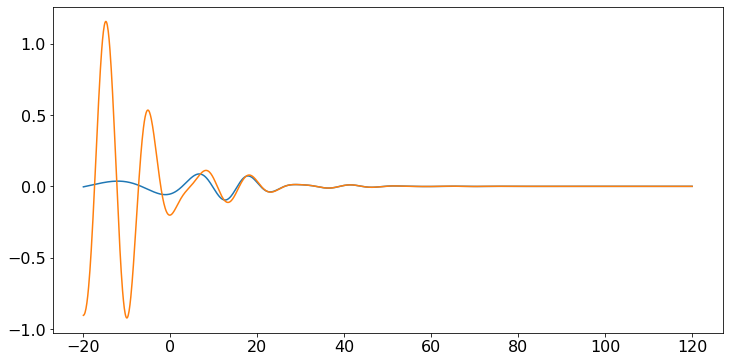

In [333]:
plt.plot(x, y.real)
plt.plot(x, yhat.real)

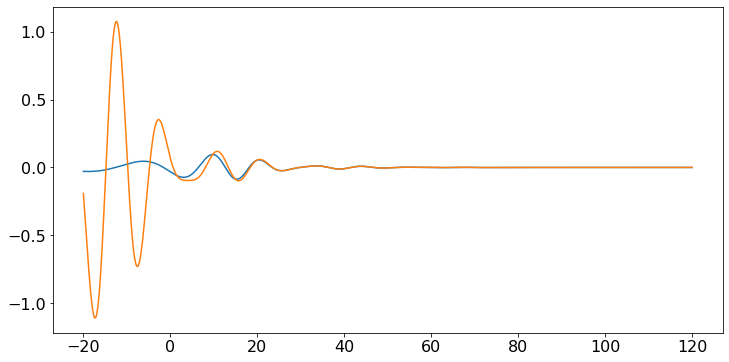

In [334]:
plt.plot(x, y.imag)
plt.plot(x, yhat.imag)

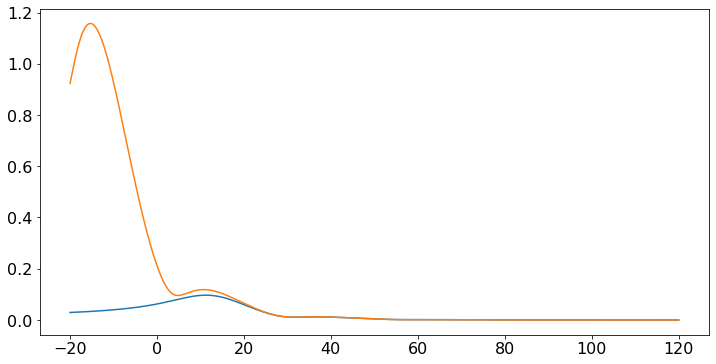

In [335]:
plt.plot(x, np.abs(y))
plt.plot(x, np.abs(yhat))

In [336]:
# eq.1 from https://arxiv.org/abs/1406.0401
# like this
ybar = y*np.conj(yhat)
ybar_phase = np.unwrap(np.angle(ybar))

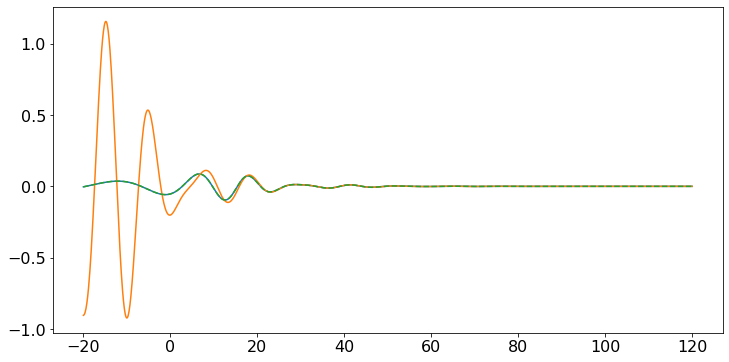

In [337]:
plt.plot(x, y.real)
plt.plot(x, yhat.real)
plt.plot(x, np.real(ybar/np.conj(yhat)), ls='--')

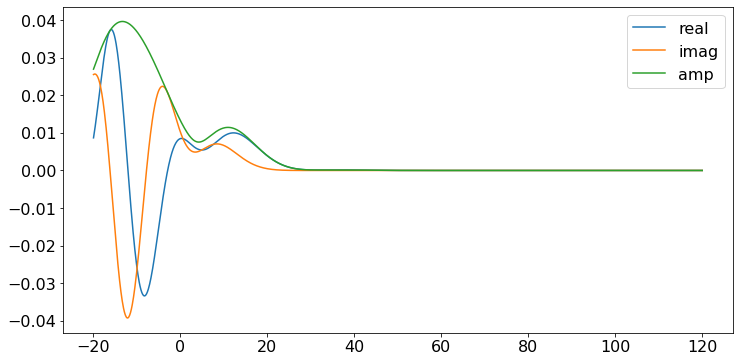

In [338]:
plt.plot(x, ybar.real, label='real')
plt.plot(x, ybar.imag, label='imag')
plt.plot(x, np.abs(ybar), label='amp')
plt.legend()

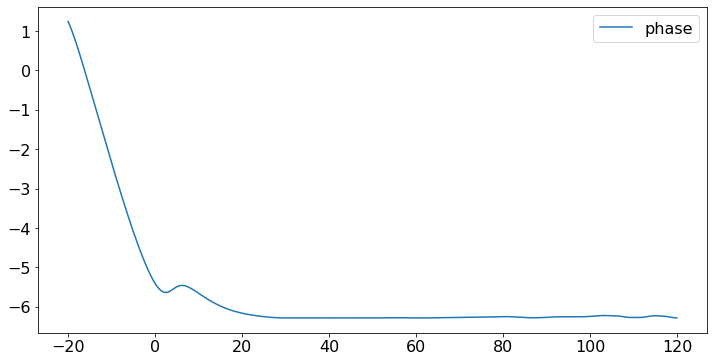

In [339]:
plt.plot(x, ybar_phase, label='phase')
plt.legend()

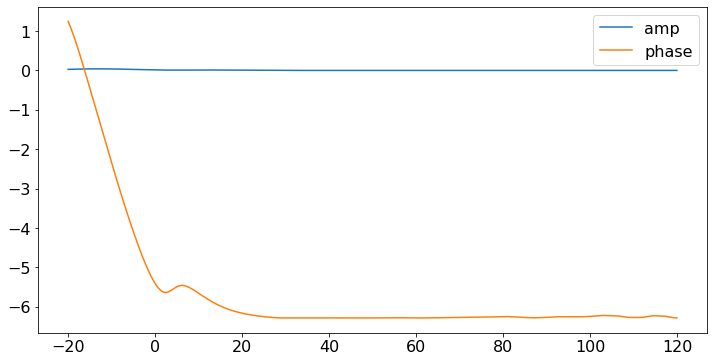

In [340]:
plt.plot(x, np.abs(ybar), label='amp')
plt.plot(x, ybar_phase, label='phase')
plt.legend()

In [341]:
# look at log scale

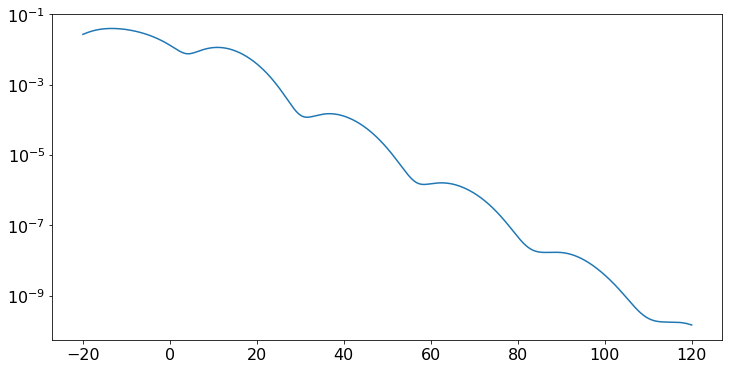

In [342]:
plt.plot(x, np.abs(ybar))
plt.yscale('log')

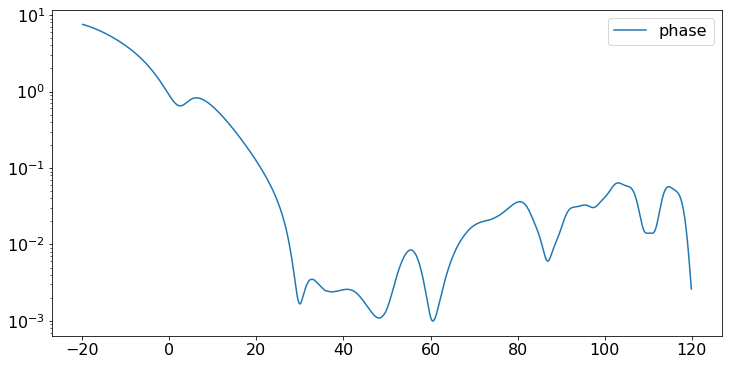

In [343]:
plt.plot(x, ybar_phase-np.min(ybar_phase)+1e-3, label='phase')
plt.legend()
plt.yscale('log')

In [344]:
ybar_phase_d1 = IUS(x, ybar_phase).derivative(n=1)(x)

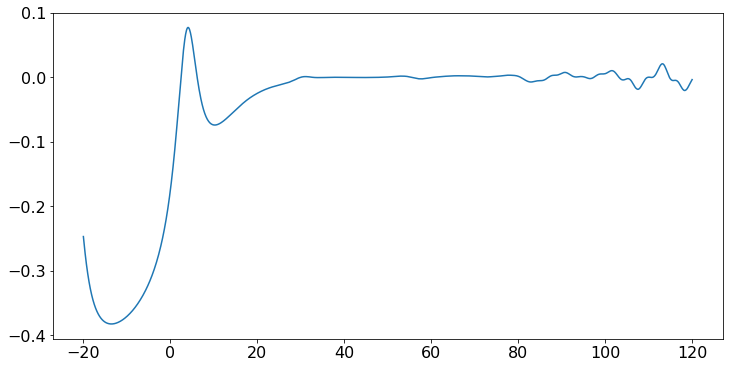

In [345]:
plt.plot(x, ybar_phase_d1)

## two mode model + plus 2 tones

In [668]:
mask_fit = (t >= 0) & (t <= 200)
# mask_fit = (t >= 10) & (t <= 200)
# mask_fit = (t >= 30) & (t <= 200)
x = t[mask_fit]
# y_strain = s_22[mask_fit]
y_strain = s_32[mask_fit]
y = y_strain.real

In [669]:
# f_ring = metadata.loc[idx]['fring']
# f_damp = metadata.loc[idx]['fdamp']

# q=1 numbers
f_ring = 0.088087
f_damp = 0.013596

In [670]:
f_ring_angular = f_ring*2*np.pi
f_damp_angular = f_damp*2*np.pi

print(f_ring_angular)
print(f_damp_angular)

print(1/f_damp_angular)

0.5534669441535282
0.08542618743641366
11.706012289783418


In [671]:
def resid(params, x, ydata=None, use_sin=False):
    #n=0
    decay_22 = params['decay_22'].value
    phi0_22 = params['phi0_22'].value
    t0_22 = params['t0_22'].value
    omega_22 = params['omega_22'].value
    amp_22 = params['amp_22'].value
    
    decay_32 = params['decay_32'].value
    phi0_32 = params['phi0_32'].value
    t0_32 = params['t0_32'].value
    omega_32 = params['omega_32'].value
    amp_32 = params['amp_32'].value
    
    #n=1
    decay_22_1 = params['decay_22_1'].value
    phi0_22_1 = params['phi0_22_1'].value
    # phi0_22_1 = phi0_22
    # t0_22_1 = params['t0_22_1'].value
    t0_22_1 = t0_22
    omega_22_1 = params['omega_22_1'].value
    amp_22_1 = params['amp_22_1'].value
    
    decay_32_1 = params['decay_32_1'].value
    phi0_32_1 = params['phi0_32_1'].value
    # phi0_32_1 = phi0_32
    # t0_32_1 = params['t0_32_1'].value
    t0_32_1 = t0_32
    omega_32_1 = params['omega_32_1'].value
    amp_32_1 = params['amp_32_1'].value

    if use_sin:
        term_22 = amp_22 * np.exp(-(x-t0_22)/decay_22) * np.sin(x*omega_22 + phi0_22)
        term_32 = amp_32 * np.exp(-(x-t0_32)/decay_32) * np.sin(x*omega_32 + phi0_32)
        
        term_22_1 = amp_22_1 * np.exp(-(x-t0_22_1)/decay_22_1) * np.sin(x*omega_22_1 + phi0_22_1)
        term_32_1 = amp_32_1 * np.exp(-(x-t0_32_1)/decay_32_1) * np.sin(x*omega_32_1 + phi0_32_1)
        y_model = term_22 + term_32 + term_22_1 + term_32_1
    else:
        term_22 = amp_22 * np.exp(-(x-t0_22)/decay_22) * np.cos(x*omega_22 + phi0_22)
        term_32 = amp_32 * np.exp(-(x-t0_32)/decay_32) * np.cos(x*omega_32 + phi0_32)
        
        term_22_1 = amp_22_1 * np.exp(-(x-t0_22_1)/decay_22_1) * np.cos(x*omega_22_1 + phi0_22_1)
        term_32_1 = amp_32_1 * np.exp(-(x-t0_32_1)/decay_32_1) * np.cos(x*omega_32_1 + phi0_32_1)
        y_model = term_22 + term_32 + term_22_1 + term_32_1
    if type(ydata) == np.ndarray:
        return y_model - ydata
    else:
        return y_model

In [672]:
phi0_init = 1.0
t0_init = 1.0
amp_init = 0.5
# omega_init = 0.5
omega_22_init = f_ring_angular
# decay_init = 17
decay_22_init = 1/f_damp_angular

omega_32_init = omega_22_init
decay_32_init = decay_22_init






np.random.seed(2)
# x = np.linspace(0, 10, 101)
# y = offset + amp*np.sin(omega*x) * np.exp(-x/decay)
# yn = y + np.random.normal(size=y.size, scale=0.450)

params = lmfit.Parameters()
#n=0 tone
params.add('phi0_22', phi0_init, min=-100, max=100.0)
params.add('t0_22', t0_init, min=-100, max=100.0)
params.add('omega_22', omega_22_init, min=0, max=100.0, vary=True)
params.add('amp_22', amp_init, min=0, max=100.0)
params.add('decay_22', decay_22_init, min=0, max=100.0, vary=True)

params.add('phi0_32', phi0_init, min=-100, max=100.0)
params.add('t0_32', t0_init, min=-100, max=100.0)
params.add('omega_32', omega_32_init, min=0, max=100.0, vary=True)
params.add('amp_32', amp_init, min=0, max=100.0)
params.add('decay_32', decay_32_init, min=0, max=100.0, vary=True)

#n=1 tone
params.add('phi0_22_1', phi0_init, min=-100, max=100.0)
# params.add('t0_22_1', t0_init, min=-100, max=100.0)
params.add('omega_22_1', omega_22_init, min=0, max=100.0, vary=True)
params.add('amp_22_1', amp_init, min=0, max=100.0)
params.add('decay_22_1', decay_22_init, min=0, max=100.0, vary=True)

params.add('phi0_32_1', phi0_init, min=-100, max=100.0)
# params.add('t0_32_1', t0_init, min=-100, max=100.0)
params.add('omega_32_1', omega_32_init, min=0, max=100.0, vary=True)
params.add('amp_32_1', amp_init, min=0, max=100.0)
params.add('decay_32_1', decay_32_init, min=0, max=100.0, vary=True)

# Note: assumed that the time offset for the same lm but different n are the same to reduce d.o.f.
# number of free parameters (assuming we can freq and damp from pert theory) is 2 for each term + 2 (for the time offset for each lm mode)
# so for 220, 221, 320, 321 we have 10 unknown parameters
# other people use things like continuity to fix some unknowns.
# this model is quite nice in that it seems to work quite well and you can argue why it's a good physical model
# however, there are also lots of papers for and against this kind of thing.

# is it possible that we can predict the n=1 parameters from the n=0 parameters? that would reduce the d.o.f

# params.add('decay', 11, min=0, max=100.0, vary=False)
o1 = lmfit.minimize(resid, params, args=(x, y), method='leastsq')
print("# Fit using leastsq:")
lmfit.report_fit(o1)

# Fit using leastsq:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3905
    # data points      = 2000
    # variables        = 18
    chi-square         = 1.5797e-05
    reduced chi-square = 7.9701e-09
    Akaike info crit   = -37277.2240
    Bayesian info crit = -37176.4077
[[Variables]]
    phi0_22:     0.97629721 +/- 0.02507783 (2.57%) (init = 1)
    t0_22:      -16.3958043 +/- 26920.4827 (164191.29%) (init = 1)
    omega_22:    0.88962709 +/- 0.00153789 (0.17%) (init = 0.5534669)
    amp_22:      0.19766043 +/- 655.770597 (331766.25%) (init = 0.5)
    decay_22:    8.11385941 +/- 0.08914320 (1.10%) (init = 11.70601)
    phi0_32:    -1.33733710 +/- 0.00792137 (0.59%) (init = 1)
    t0_32:      -6.10783820 +/- 57068.5114 (934348.78%) (init = 1)
    omega_32:    0.78197467 +/- 2.5259e-04 (0.03%) (init = 0.5534669)
    amp_32:      0.12194179 +/- 540.450626 (443203.78%) (init = 0.5)
    decay_32:    12.8697504 +/- 0.04562415 (0.35%) (init = 11.70601)
    p

In [673]:
o1.params

Parameters([('phi0_22', <Parameter 'phi0_22', value=0.9762972118297881 +/- 0.0251, bounds=[-100:100.0]>), ('t0_22', <Parameter 't0_22', value=-16.395804282093607 +/- 2.69e+04, bounds=[-100:100.0]>), ('omega_22', <Parameter 'omega_22', value=0.8896270910557891 +/- 0.00154, bounds=[0:100.0]>), ('amp_22', <Parameter 'amp_22', value=0.19766042780979265 +/- 656, bounds=[0:100.0]>), ('decay_22', <Parameter 'decay_22', value=8.11385940855759 +/- 0.0891, bounds=[0:100.0]>), ('phi0_32', <Parameter 'phi0_32', value=-1.3373371026787169 +/- 0.00792, bounds=[-100:100.0]>), ('t0_32', <Parameter 't0_32', value=-6.107838199326011 +/- 5.71e+04, bounds=[-100:100.0]>), ('omega_32', <Parameter 'omega_32', value=0.7819746654939175 +/- 0.000253, bounds=[0:100.0]>), ('amp_32', <Parameter 'amp_32', value=0.12194179028718333 +/- 540, bounds=[0:100.0]>), ('decay_32', <Parameter 'decay_32', value=12.869750369924999 +/- 0.0456, bounds=[0:100.0]>), ('phi0_22_1', <Parameter 'phi0_22_1', value=-7.013382721771748 +/- 0.00631, bounds=[-100:100.0]>), ('omega_22_1', <Parameter 'omega_22_1', value=0.4081399154998333 +/- 0.000465, bounds=[0:100.0]>), ('amp_22_1', <Parameter 'amp_22_1', value=2.649297656254146 +/- 1.28e+04, bounds=[0:100.0]>), ('decay_22_1', <Parameter 'decay_22_1', value=5.5522822675547365 +/- 0.0166, bounds=[0:100.0]>), ('phi0_32_1', <Parameter 'phi0_32_1', value=2.591077554264885 +/- 0.00215, bounds=[-100:100.0]>), ('omega_32_1', <Parameter 'omega_32_1', value=0.5455051155649981 +/- 7.83e-05, bounds=[0:100.0]>), ('amp_32_1', <Parameter 'amp_32_1', value=0.36372261074503753 +/- 1.69e+03, bounds=[0:100.0]>), ('decay_32_1', <Parameter 'decay_32_1', value=12.256816795854785 +/- 0.0121, bounds=[0:100.0]>)])

In [674]:
yhat = resid(o1.params, x)

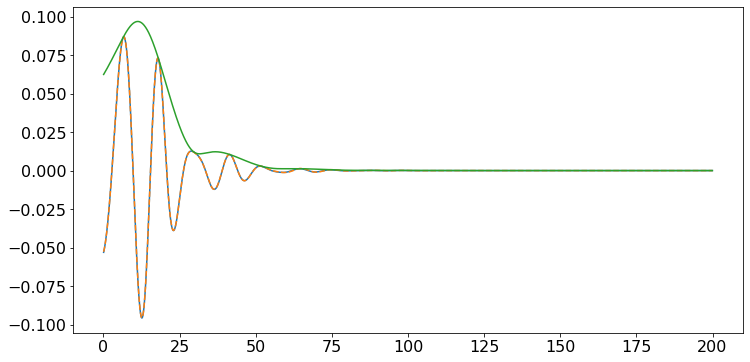

In [675]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.plot(x, yhat, ls='--')
plt.plot(x, np.abs(y_strain))
# plt.yscale('log')

In [676]:
# mask = (t >= -1000) & (t <= 200)
# mask = (t >= -100) & (t <= 200)
# mask = (t >= -100) & (t <= 120)
# mask = (t >= 0) & (t <= 150)
mask = (t >= 0) & (t <= 120)
# mask = (t >= -20) & (t <= 120)
x = t[mask]
y = s_32[mask]

In [677]:
yhat_real = resid(o1.params, x)

In [678]:
yhat_imag = resid(o1.params, x, use_sin=True)

In [679]:
yhat = yhat_real + 1.j*yhat_imag

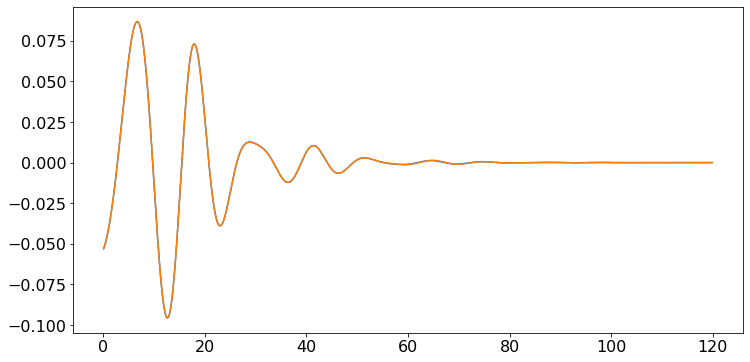

In [680]:
plt.plot(x, y.real)
plt.plot(x, yhat.real)

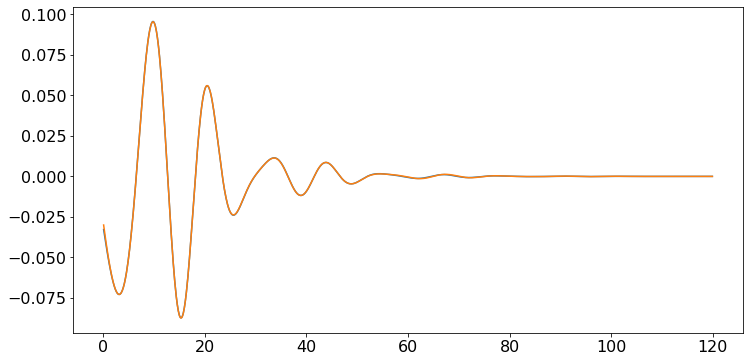

In [681]:
plt.plot(x, y.imag)
plt.plot(x, yhat.imag)

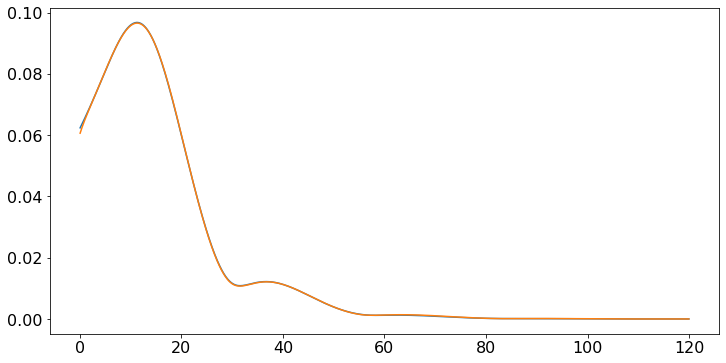

In [682]:
plt.plot(x, np.abs(y))
plt.plot(x, np.abs(yhat))

In [683]:
# eq.1 from https://arxiv.org/abs/1406.0401
# like this
ybar = y*np.conj(yhat)
ybar_phase = np.unwrap(np.angle(ybar))

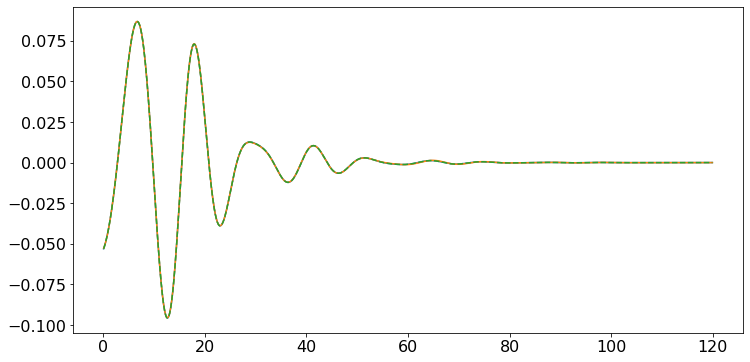

In [684]:
plt.plot(x, y.real)
plt.plot(x, yhat.real)
plt.plot(x, np.real(ybar/np.conj(yhat)), ls='--')

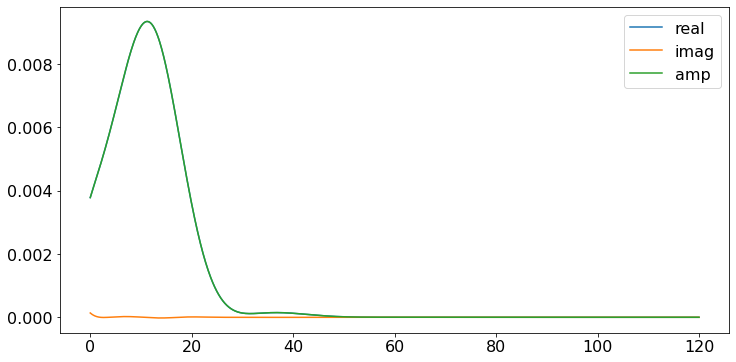

In [685]:
plt.plot(x, ybar.real, label='real')
plt.plot(x, ybar.imag, label='imag')
plt.plot(x, np.abs(ybar), label='amp')
plt.legend()

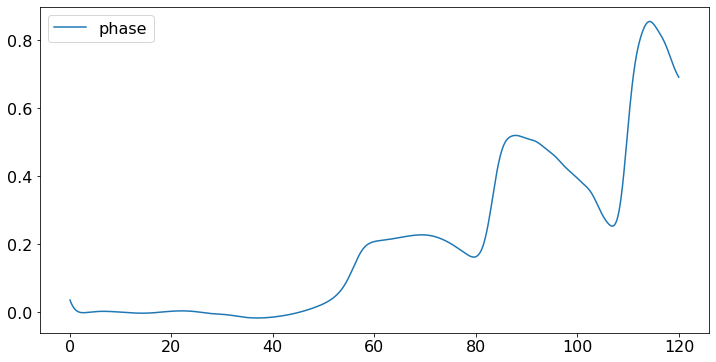

In [686]:
plt.plot(x, ybar_phase, label='phase')
plt.legend()

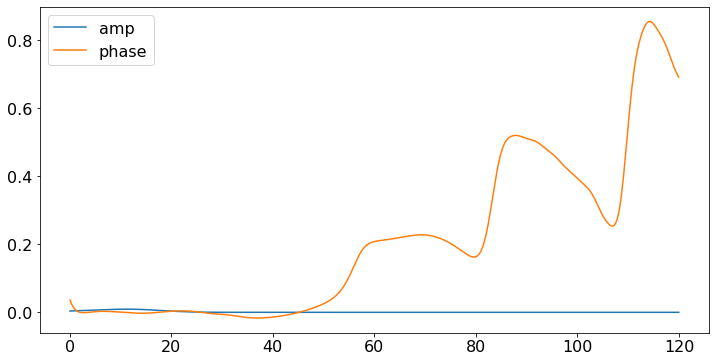

In [687]:
plt.plot(x, np.abs(ybar), label='amp')
plt.plot(x, ybar_phase, label='phase')
plt.legend()

In [688]:
# look at log scale

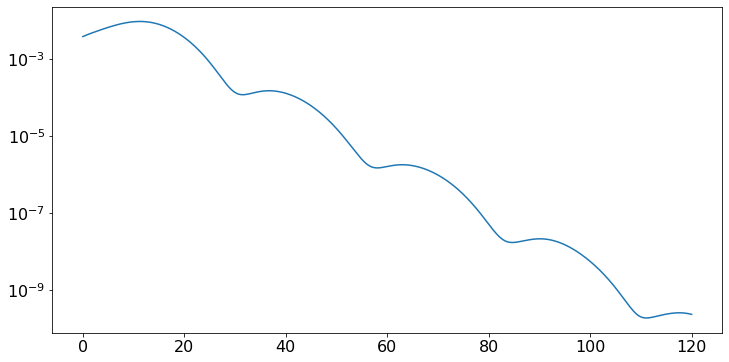

In [689]:
plt.plot(x, np.abs(ybar))
plt.yscale('log')

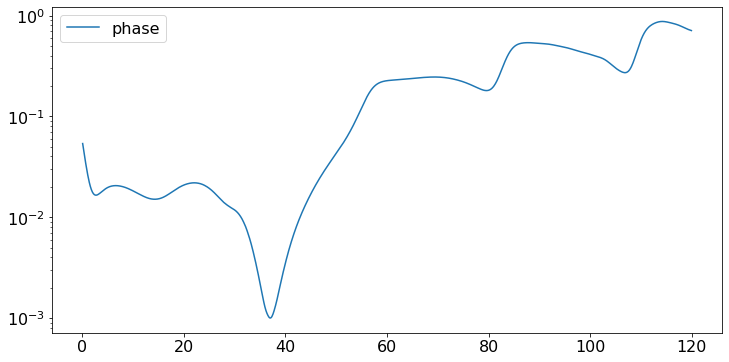

In [690]:
plt.plot(x, ybar_phase-np.min(ybar_phase)+1e-3, label='phase')
plt.legend()
plt.yscale('log')

In [691]:
ybar_phase_d1 = IUS(x, ybar_phase).derivative(n=1)(x)

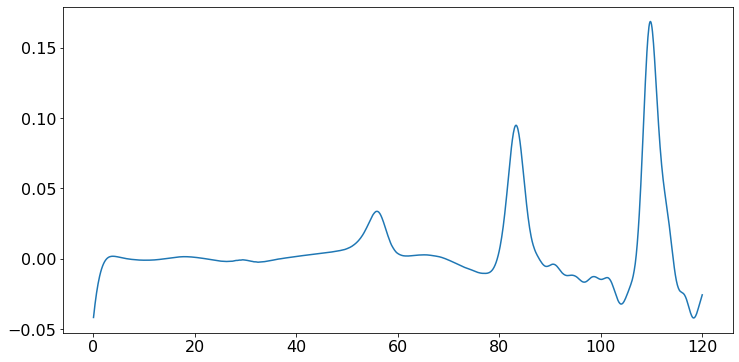

In [692]:
plt.plot(x, ybar_phase_d1)